### Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('student_info.csv')
print(df.shape)
df.head()

(200, 2)


,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


### Analyse and visualize data  

In [3]:
df.isnull().sum()

study_hours      5
student_marks    0
dtype: int64

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
None


In [5]:
df.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


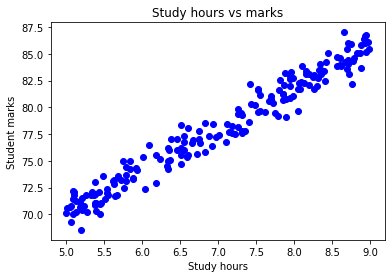

In [6]:
plt.scatter(df.study_hours,df.student_marks,c='b')
plt.title('Study hours vs marks')
plt.xlabel('Study hours')
plt.ylabel('Student marks')
plt.show()


### Preparing data for ml algorithm 

In [7]:
df2 = df.fillna(df.mean())

In [8]:
df2.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [9]:
X = df2.iloc[:,0:-1].values
y = df2.iloc[:,-1].values.reshape(-1,1)

In [10]:
print(X.shape)
print(y.shape)

(200, 1)
(200, 1)


### Selecting, training and testing the model

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [12]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(160, 1) (40, 1) (160, 1) (40, 1)


In [13]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
y_predict = linreg.predict(X_test)
y_predict 

array([[78.36701825],
       [85.52255718],
       [76.6074595 ],
       [75.78633208],
       [82.23804751],
       [83.99760626],
       [82.98097232],
       [70.85956757],
       [71.36788454],
       [73.36205113],
       [77.23308039],
       [81.02590703],
       [75.39531902],
       [76.33375036],
       [72.58002502],
       [83.99760626],
       [81.33871748],
       [72.5018224 ],
       [70.50765582],
       [76.13824383],
       [76.92026994],
       [82.08164229],
       [71.40698585],
       [77.58499214],
       [84.15401149],
       [80.98680573],
       [75.2780151 ],
       [73.40115243],
       [81.65152792],
       [72.77553154],
       [70.4294532 ],
       [85.48345588],
       [70.27304798],
       [81.26051487],
       [79.97017178],
       [82.98097232],
       [79.07084175],
       [82.31625012],
       [77.23308039],
       [77.88196154]])

### Test results give satisfactory accuracy

In [15]:
print(linreg.score(X_test,y_test))

0.9512712392255223


In [16]:
from sklearn.metrics import r2_score
r2_score(y_predict,y_test)


0.9507693394001833

In [17]:
pd.DataFrame(np.c_[X_test,y_test,y_predict],columns = ['Study hours','Marks Obtained Originally','Marks Predicted'])

,Study hours,Marks Obtained Originally,Marks Predicted
0,7.120000,78.42,78.367018
1,8.950000,85.15,85.522557
2,6.670000,76.99,76.607459
3,6.460000,76.02,75.786332
4,8.110000,83.82,82.238048
5,8.560000,84.68,83.997606
6,8.300000,82.02,82.980972
7,5.200000,68.57,70.859568
8,5.330000,71.85,71.367885
9,5.840000,74.25,73.362051


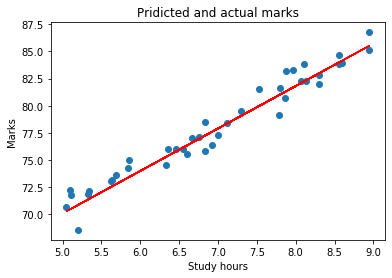

In [18]:
plt.scatter(X_test,y_test)
plt.plot(X_test,linreg.predict(X_test),c='red')
plt.title('Pridicted and actual marks')
plt.xlabel('Study hours')
plt.ylabel('Marks')
plt.show()

### Saving the model 

In [19]:
import joblib
joblib.dump(linreg,"Students_marks_predictor_model.pkl")

['Students_marks_predictor_model.pkl']

In [20]:
model = joblib.load("Students_marks_predictor_model.pkl")

In [21]:
print(model.predict([[8]])[0][0])

81.80793314726145


### Launch,moniter and maintain the system